In [ ]:
!pip install pystac-client geopandas matplotlib

# TES2025 Workshop 3 - Satellite Data Analysis for Urban Expansion with Python

## 1. Remote Sensing for Urban Applications and Case Studies

Before begining the workshop, there are some important basics that help you understand where we are going to do. Start with surf the remote sensing map application and examine what satellite imagery is...

In [118]:
%%html
<iframe src="https://browser.dataspace.copernicus.eu/?zoom=12&lat=18.78358&lng=98.98965&themeId=DEFAULT-THEME&visualizationUrl=U2FsdGVkX190XDZr9zCr3DBTgPBAH3Nu1o8rL6nnQ46vYZ4psm7Aqzu%2B%2BcSwIhdyOsTcGSq%2F%2BYa%2FER61rr0xSfExW6LW9xV0NlnSFD%2Bw06ZIuHb9a0%2F%2BUGlAIGwn5oAx&datasetId=S2_L2A_CDAS&fromTime=2024-05-27T00%3A00%3A00.000Z&toTime=2024-11-27T23%3A59%3A59.999Z&layerId=2_FALSE_COLOR&demSource3D=%22MAPZEN%22&cloudCoverage=30&dateMode=MOSAIC" width="100%" height="640"></iframe>

### Remote Sensing Basics

Sattellite Imagery or Remote Sensing, they are iterally same thing. 

#### Observation Satellite

<a href="https://sigmaearth.com/basics-of-remote-sensing-and-gis/">
<img src="img/1_1-RSbasic.png" alt="drawing" width="100%"/>
</a>

#### Sensing Spectrum

Since remote sensing satellite is similar to orbitally flying camera around the earth. It overcome normal RGB camera that their sensors are able to sense wider range of wavelength or let's say Red, Green, Blue, Near-Infared, Short-wave Infared and etc. This enables capabilities of remote sensing data visibly see differences of objects on the earth surface. e.g. Vegetation density, Built-up surface composition.


<a href="https://landscape.satsummit.io/analysis/band-combinations.html">
<img src="img/1_spectralbands.png" alt="drawing" width="100%"/>
</a>

Although there are many sensing spectral types, we can make them visualize in different ways to enhance visibility of some specific land surface in other word.


In [117]:
%%html
<iframe src="https://viewer.esa-worldcover.org/worldcover/?language=en&bbox=98.4654688429876,18.5452026721685,99.3282482076887,19.037068969886974&overlay=false&bgLayer=OSM&date=2024-11-27&layer=WORLDCOVER_2021_MAP" width="100%" height="640"></iframe>

## 2. Satellite Data Exploration

In [5]:
!pip install pystac_client planetary_computer geopandas rich rasterio matplotlib seaborn tabulate

import pystac_client
import planetary_computer

  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)



It is better to explore and familiarize the satellite data using actual data. In order to access satellite imagery data, most easiest way is to get it from open STAC collection. Additionally, we can easily use common HTTP request methods to retrieve the dataset

In [2]:
stac_endpoint = 'https://planetarycomputer.microsoft.com/api/stac/v1'

collection_name = 'landsat-c2-l2'

area_of_interest = [98.919831,18.754418,99.049607,18.819261]

date_search = "2019-12-01/2019-12-31"

max_cloud_percentage = 30

If you do not have idea to locate your area of interest, use this web site to gather the coordinate box

<a href="http://bboxfinder.com/">BBOX Finder Web</a>

In [31]:
catalog = pystac_client.Client.open(
    stac_endpoint,
    modifier=planetary_computer.sign_inplace,
)

items = catalog.search(collections=[collection_name], 
                       bbox=area_of_interest, 
                       datetime=date_search,
                       query={"eo:cloud_cover": {"lt": max_cloud_percentage}}).item_collection()

In [6]:
import geopandas as gpd

df = gpd.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326").to_markdown()
print(df)

|    | geometry                                                                                                                      |   gsd | created                     | sci:doi          | datetime                    | platform   |   proj:epsg | proj:shape   | description                  | instruments     |   eo:cloud_cover | proj:transform                               |   view:off_nadir |   landsat:wrs_row | landsat:scene_id      |   landsat:wrs_path |   landsat:wrs_type |   view:sun_azimuth | landsat:correction   |   view:sun_elevation |   landsat:cloud_cover_land |   landsat:collection_number | landsat:collection_category   |
|---:|:------------------------------------------------------------------------------------------------------------------------------|------:|:----------------------------|:-----------------|:----------------------------|:-----------|------------:|:-------------|:-----------------------------|:----------------|-----------------:|:--------------------------

In [10]:
import rich.table

table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in items[0].assets.items():
    table.add_row(asset_key, asset.title)

table

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key        ┃ Description                                                          ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ qa               │ Surface Temperature Quality Assessment Band                          │
│ ang              │ Angle Coefficients File                                              │
│ red              │ Red Band                                                             │
│ blue             │ Blue Band                                                            │
│ drad             │ Downwelled Radiance Band                                             │
│ emis             │ Emissivity Band                                                      │
│ emsd             │ Emissivity Standard Deviation Band                                   │
│ trad             │ Thermal Radiance Band                                                │
│ urad             │ Upwelled Radiance Band                                               │
│ atran            │ Atmospheric Transmittance Band                                       │
│ cdist            │ Cloud Distance Band                                                  │
│ green            │ Green Band                                                           │
│ nir08            │ Near Infrared Band 0.8                                               │
│ lwir11           │ Surface Temperature Band                                             │
│ swir16           │ Short-wave Infrared Band 1.6                                         │
│ swir22           │ Short-wave Infrared Band 2.2                                         │
│ coastal          │ Coastal/Aerosol Band                                                 │
│ mtl.txt          │ Product Metadata File (txt)                                          │
│ mtl.xml          │ Product Metadata File (xml)                                          │
│ mtl.json         │ Product Metadata File (json)                                         │
│ qa_pixel         │ Pixel Quality Assessment Band                                        │
│ qa_radsat        │ Radiometric Saturation and Terrain Occlusion Quality Assessment Band │
│ qa_aerosol       │ Aerosol Quality Assessment Band                                      │
│ tilejson         │ TileJSON with default rendering                                      │
│ rendered_preview │ Rendered preview                                                     │
└──────────────────┴──────────────────────────────────────────────────────────────────────┘

In [11]:
from IPython.display import Image

item_index = 2
preview_asset_name = 'rendered_preview'

Image(url=items[item_index].assets[preview_asset_name].href, width=500)

In [12]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


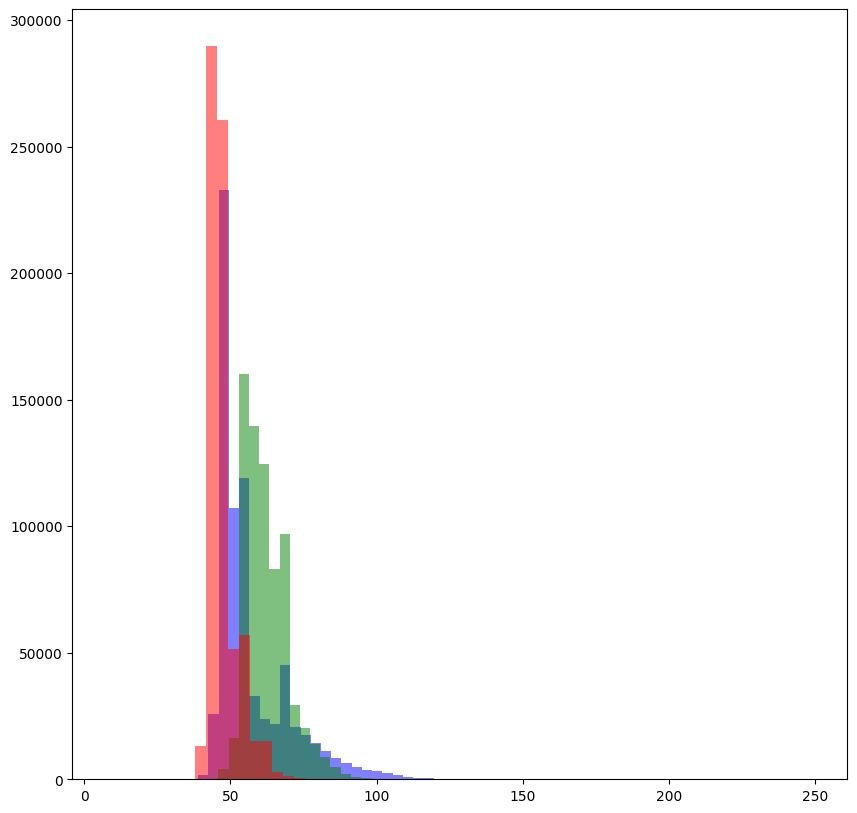

In [28]:
#fig1, axs1 = plt.subplots(1, 3, figsize=(15, 5))

plt.figure(figsize=(10, 10))

with rasterio.open(items[item_index].assets['rendered_preview'].href) as src: 
    #axs1[0].imshow(src.read(1), cmap='Reds')
    data = src.read()
    #data_msk = data[np.nonzero(data)]
    #print(data.shape)
    #print(data_msk.shape)
    #axs2.hist(data[0][data[0] != 0], bins=255, color='red', alpha=0.5)
    plt.hist(data[0][data[0] > 0], bins=64, color='blue', alpha=0.5)
    plt.hist(data[1][data[1] > 0], bins=64, color='green', alpha=0.5)
    plt.hist(data[2][data[2] > 0], bins=64, color='red', alpha=0.5)
    #axs2.hist(data[1][data[1] != 0], bins=255, color='green', alpha=0.5)
    #axs2.hist(data[2][data[2] != 0], bins=255, color='blue', alpha=0.5)

#fig1.show()

#axs2.set_xlim(5000, 15000)
plt.show()



In [32]:
# Calculate NDVI, NDWI, NDBI
from rasterio import Affine
from rasterio.enums import Resampling
import numpy as np

# Open the red band raster
with rasterio.open(items[item_index].assets['red'].href) as red_src:
    red = red_src.read(1, resampling=Resampling.nearest)  # Read the first band
    profile = red_src.profile  # Get the profile for output

# Open the NIR band raster
with rasterio.open(items[item_index].assets['nir08'].href) as nir_src:
    nir = nir_src.read(1, resampling=Resampling.nearest)  # Read the first band

In [33]:
# Handle nodata values
red = np.where(red_src.nodata is not None, np.where(red == red_src.nodata, np.nan, red), red)
nir = np.where(nir_src.nodata is not None, np.where(nir == nir_src.nodata, np.nan, nir), nir)

# Calculate NDVI
ndvi = (nir - red) / (nir + red + 1e-10)  # Add a small value to avoid division by zero


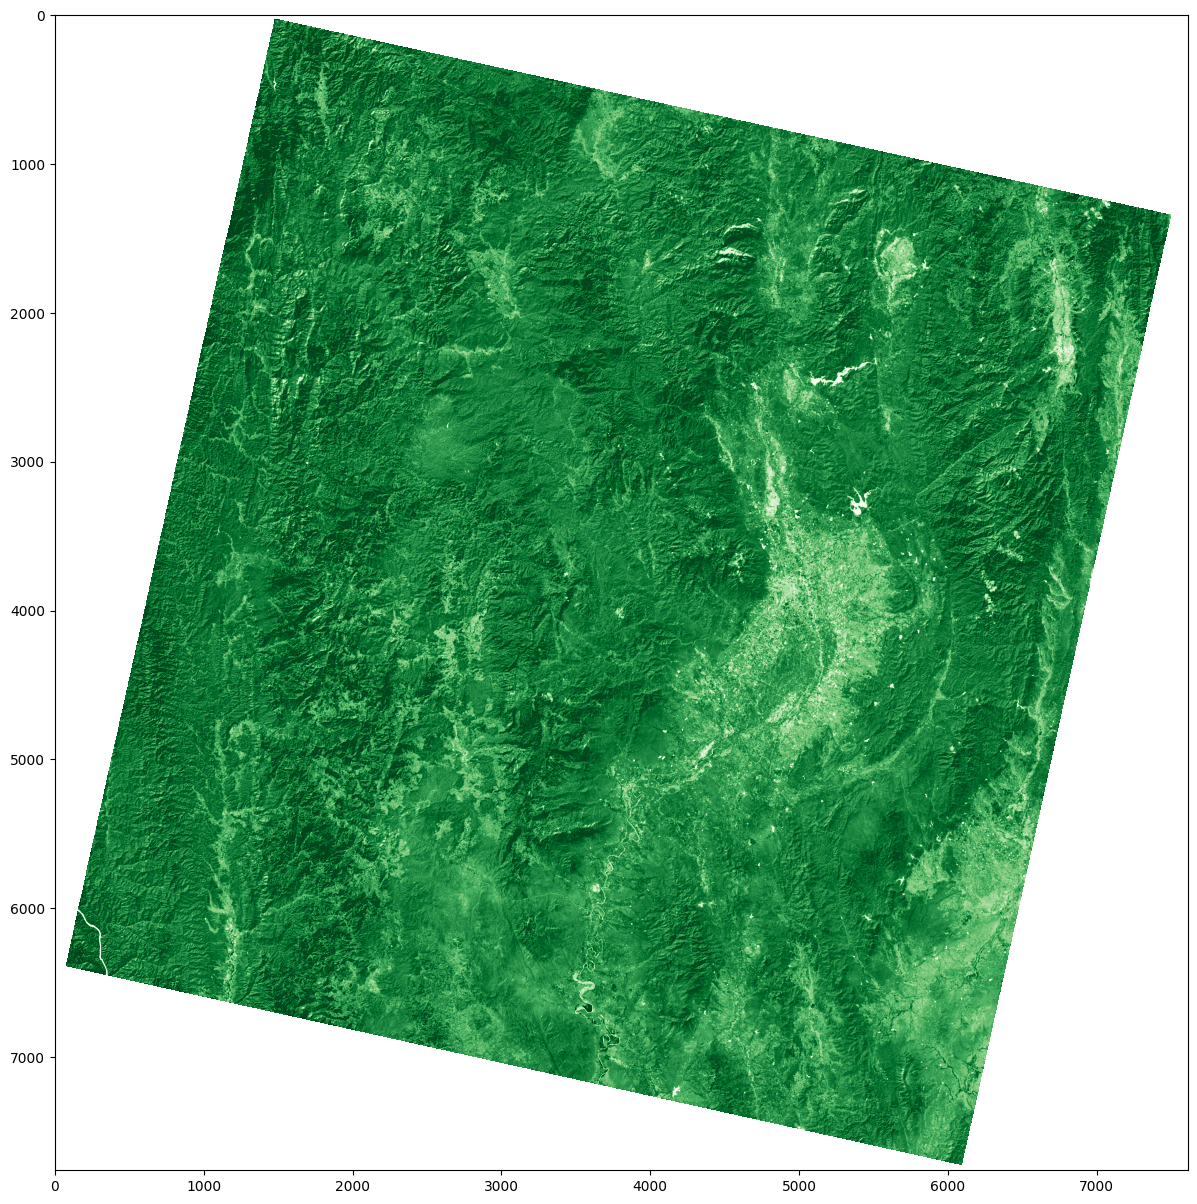

In [34]:
plt.figure(figsize=(15,15))
plt.imshow(ndvi, cmap='Greens', vmin=0.0, vmax=0.4)
plt.show()

In [35]:
# Open the red band raster
with rasterio.open(items[item_index].assets['green'].href) as green_src:
    green = green_src.read(1, resampling=Resampling.nearest)  # Read the first band
    profile = green_src.profile  # Get the profile for output

# Open the NIR band raster
with rasterio.open(items[item_index].assets['nir08'].href) as nir_src:
    nir = nir_src.read(1, resampling=Resampling.nearest)  # Read the first band
    
# Handle nodata values
green = np.where(green_src.nodata is not None, np.where(green == green_src.nodata, np.nan, green), green)
nir = np.where(nir_src.nodata is not None, np.where(nir == nir_src.nodata, np.nan, nir), nir)

# Calculate NDVI
ndwi = (green - nir) / (green + nir + 1e-10)  # Add a small value to avoid division by zero


RasterioIOError: Read failed. See previous exception for details.

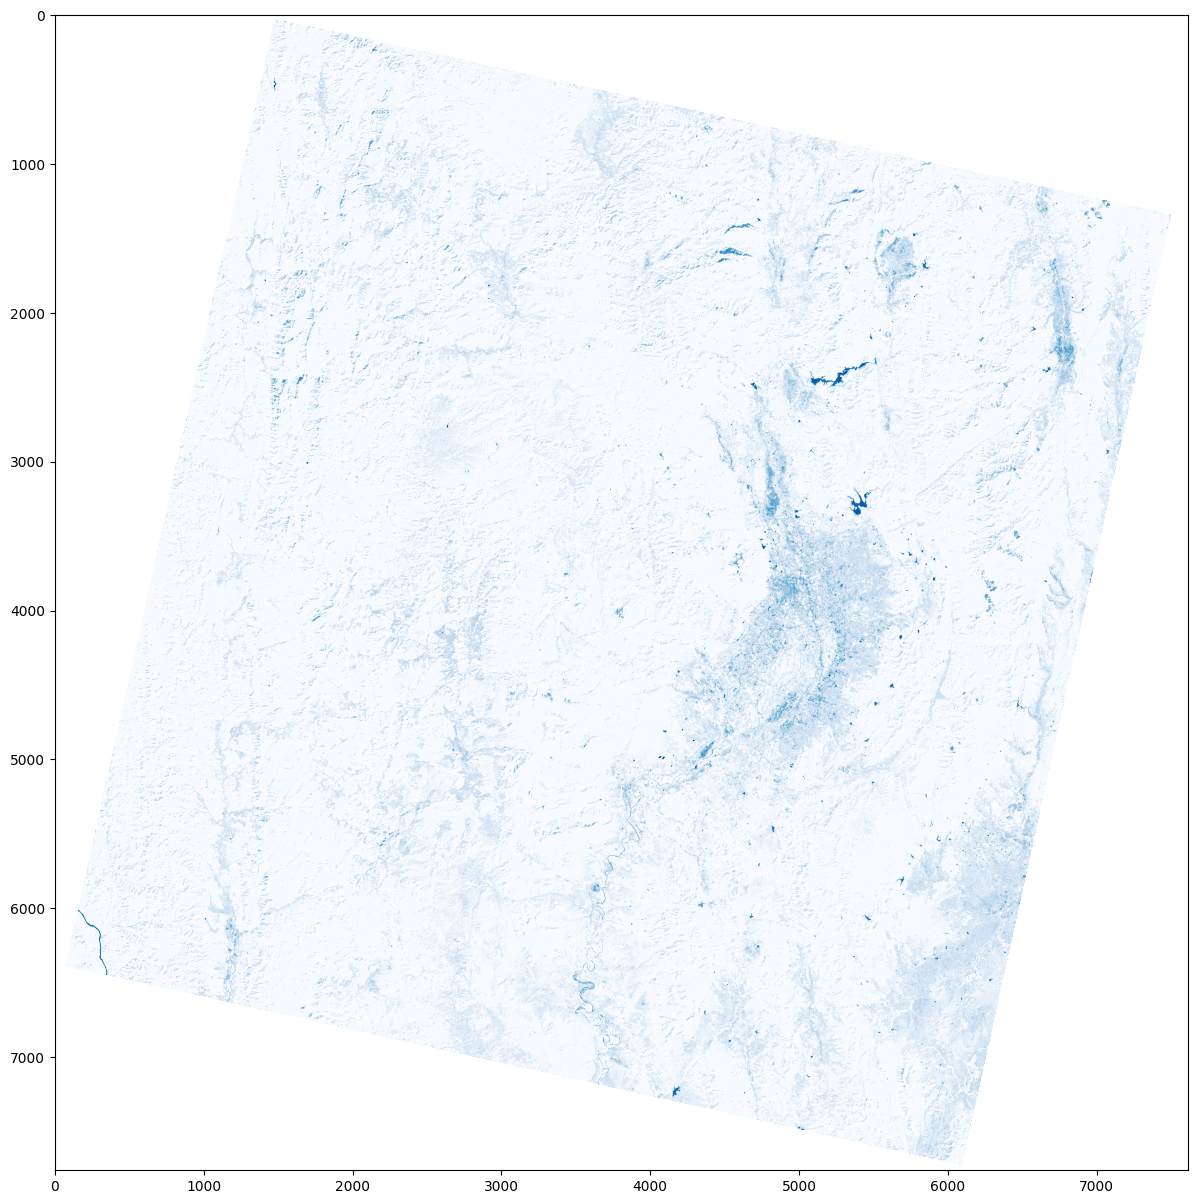

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(ndwi, cmap='Blues', vmin=-0.3, vmax=0.1)
plt.show()

In [ ]:
# Open the red band raster
with rasterio.open(items[item_index].assets['swir22'].href) as swir_src:
    swir = swir_src.read(1, resampling=Resampling.nearest)  # Read the first band
    profile = swir_src.profile  # Get the profile for output

# Open the NIR band raster
with rasterio.open(items[item_index].assets['nir08'].href) as nir_src:
    nir = nir_src.read(1, resampling=Resampling.nearest)  # Read the first band
    
# Handle nodata values
swir = np.where(swir_src.nodata is not None, np.where(swir == swir_src.nodata, np.nan, swir), swir)
nir = np.where(nir_src.nodata is not None, np.where(nir == nir_src.nodata, np.nan, nir), nir)

# Calculate NDVI
ndbi = (swir - nir) / (swir + nir + 1e-10)  # Add a small value to avoid division by zero


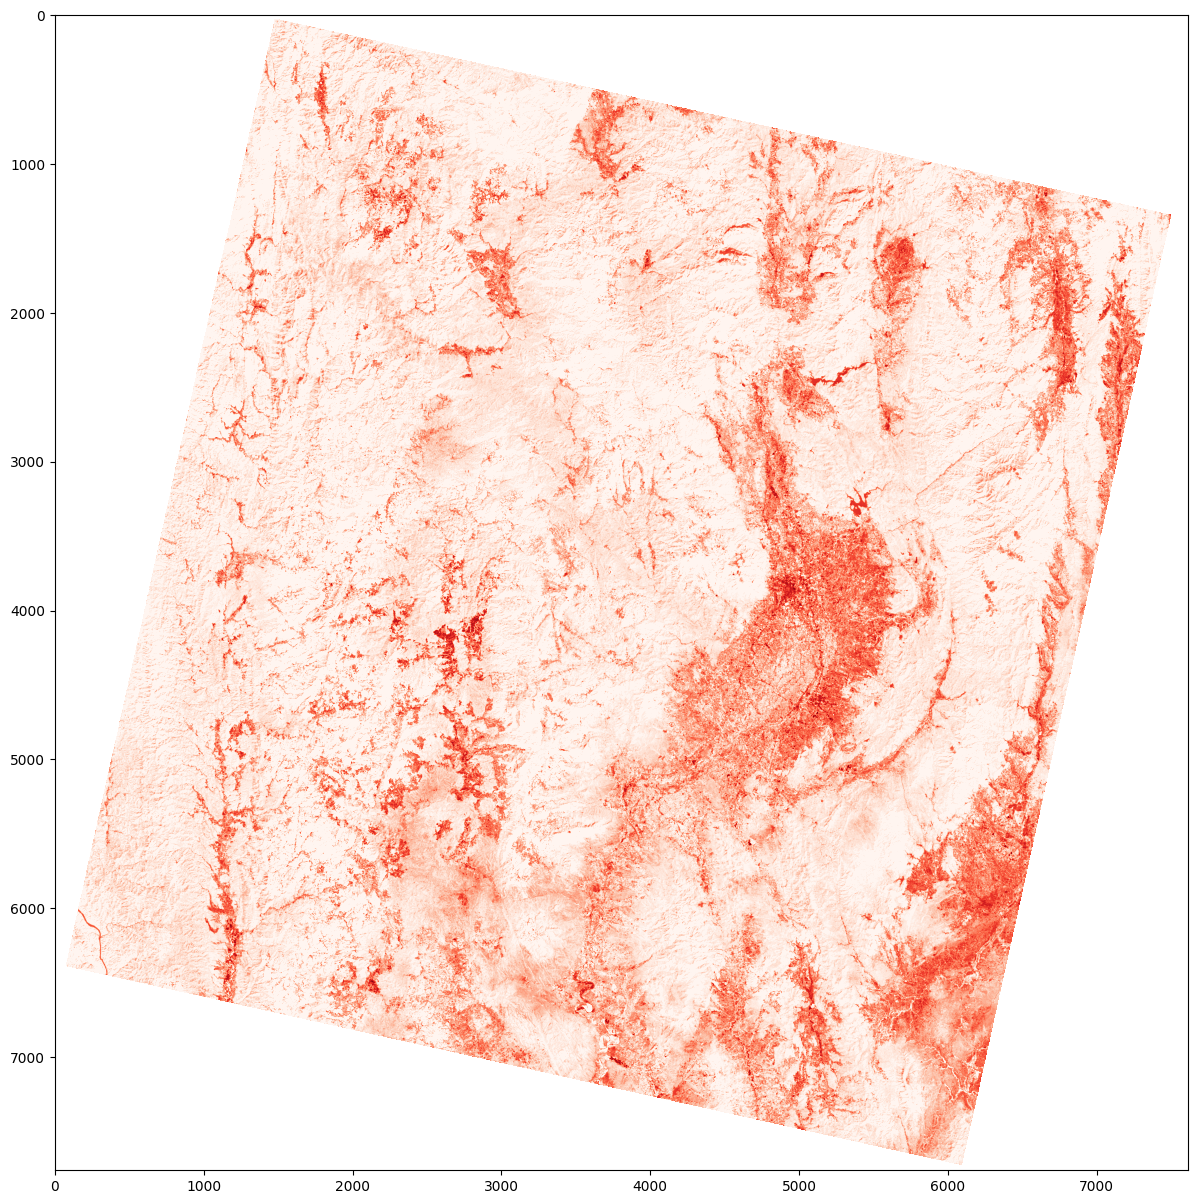

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(ndbi, cmap='Reds', vmin=-0.3, vmax=0.1)
plt.show()

(-0.5, 0.5)

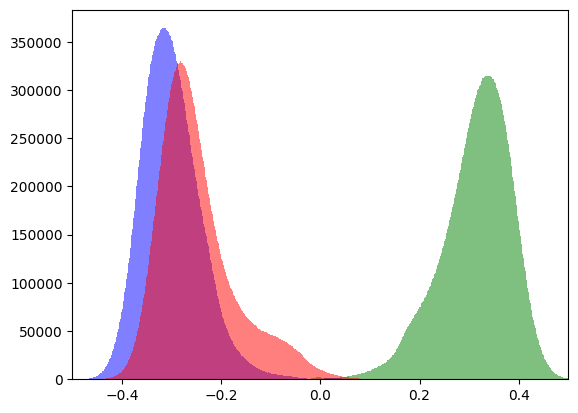

In [144]:
plt.hist(ndvi.ravel(), bins=1000, color='green', alpha=0.5)
plt.hist(ndwi.ravel(), bins=1000, color='blue', alpha=0.5)
plt.hist(ndbi.ravel(), bins=1000, color='red', alpha=0.5)
plt.xlim(-0.5, 0.5)

In [29]:
plt.figure(figsize=(15,15))
plt.imshow((ndvi > 0.4).astype(int), cmap='Reds')
plt.show()

NameError: name 'ndvi' is not defined

<Figure size 1500x1500 with 0 Axes>